<a href="https://colab.research.google.com/github/KagontleBooysen/ols-correlation-analysis/blob/main/Exercise_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# E7.1 Linear Discriminant Analysis (LDA)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_health = "/content/drive/MyDrive/data/fetal_health.csv"

In [4]:
df = pd.read_csv(df_health)
print(df.head())

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73

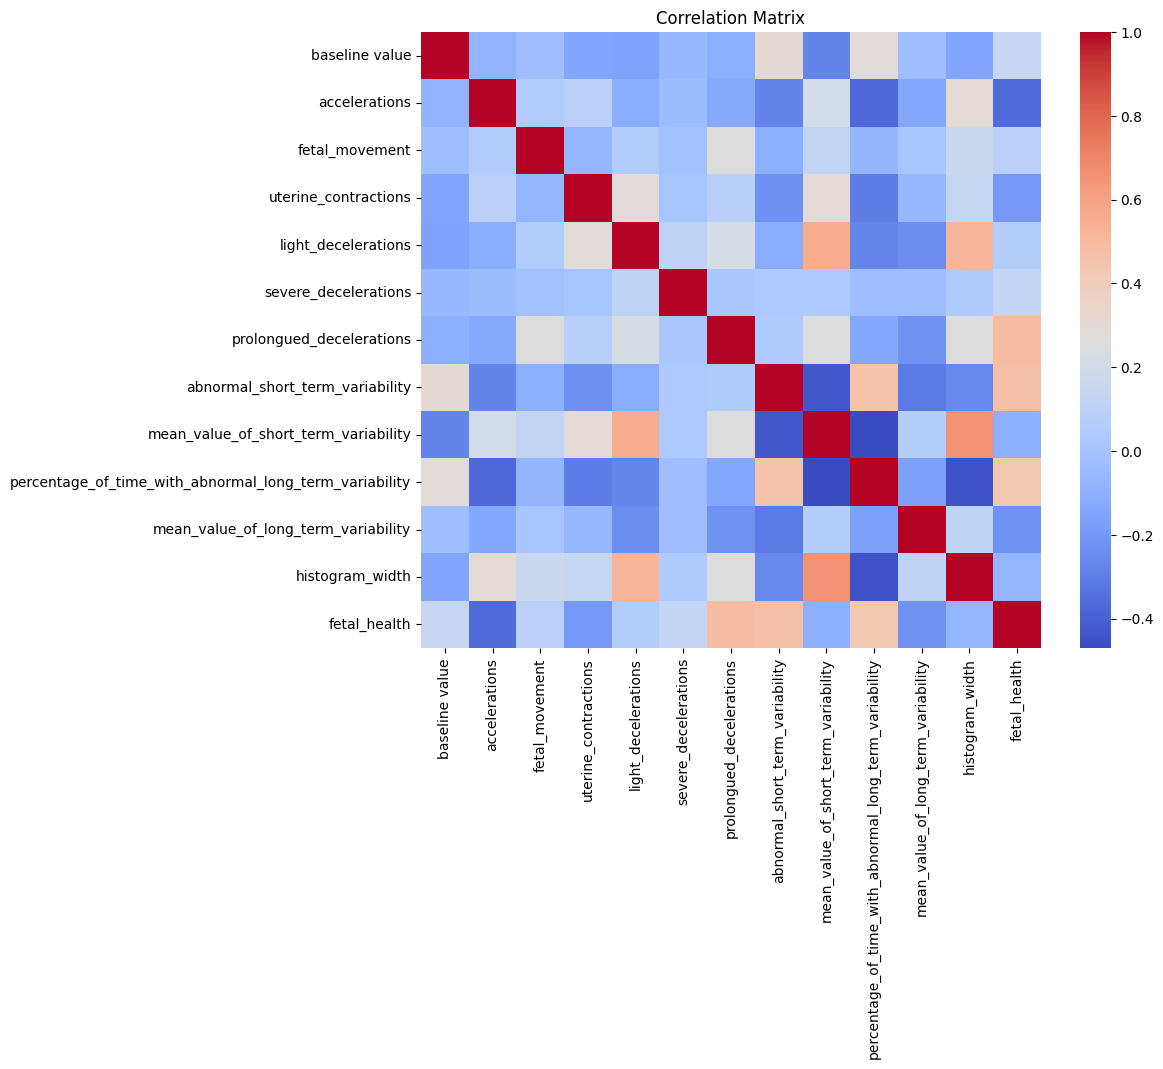

In [5]:
# 3) Compute correlation
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

In [6]:
# Find two predictors most correlated with 'fetal_health'
target_corr = corr['fetal_health'].abs().sort_values(ascending=False)
print("Top correlations with fetal_health:\n", target_corr.head(3))

Top correlations with fetal_health:
 fetal_health                       1.000000
prolongued_decelerations           0.484859
abnormal_short_term_variability    0.471191
Name: fetal_health, dtype: float64


In [7]:
# Select the top 2 features
top2_features = target_corr.index[1:3].tolist()
print("Selected predictors:", top2_features)

Selected predictors: ['prolongued_decelerations', 'abnormal_short_term_variability']


In [8]:
# Define X and y
X = df[top2_features]
y = df['fetal_health']

In [9]:
# 4) Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# 5) Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
# 6) Perform LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

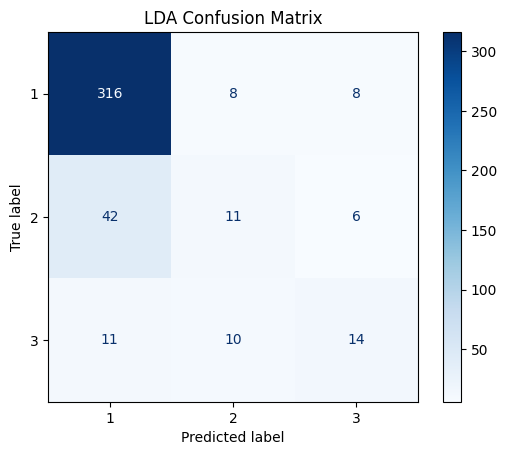

In [12]:
# 7) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp.plot(cmap='Blues')
plt.title("LDA Confusion Matrix")
plt.show()

In [13]:
# Percentage of correct classification per category
acc_per_class = cm.diagonal() / cm.sum(axis=1) * 100
for label, acc in zip(lda.classes_, acc_per_class):
    print(f"Class {label}: {acc:.2f}% correct")

Class 1: 95.18% correct
Class 2: 18.64% correct
Class 3: 40.00% correct


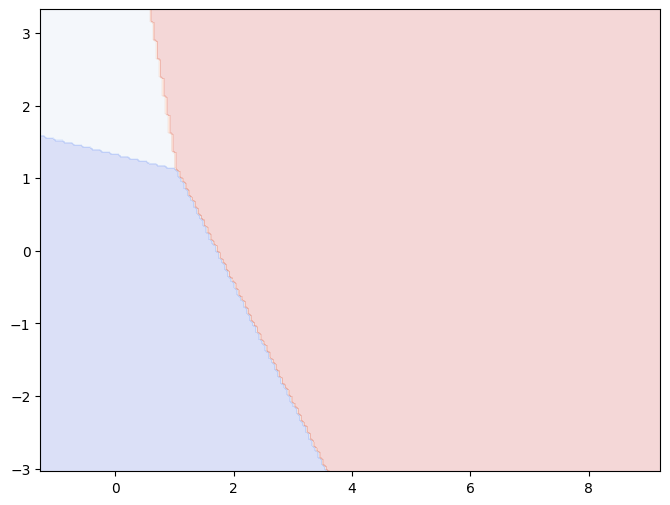

In [14]:
# 8) Visualization – scatter plot + decision boundaries
plt.figure(figsize=(8, 6))

# Plot decision boundaries
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

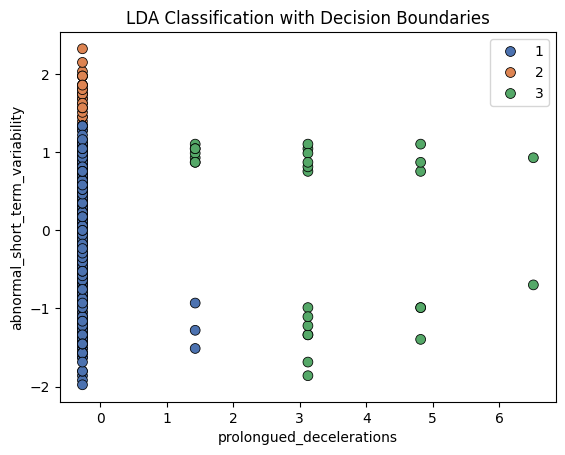

In [24]:
# Scatter plot of test points
sns.scatterplot(
    x=X_test[:, 0],
    y=X_test[:, 1],
    hue=y_pred,
    palette='deep',
    s=50,
    edgecolor='k'
)

plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.title("LDA Classification with Decision Boundaries")
plt.show()

**E7.2 – Quadratic Discriminant Analysis (QDA)**

# E7.2 Quadratic Discriminant Analysis (QDA)

In [17]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 1) Use the same standardized data and split
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

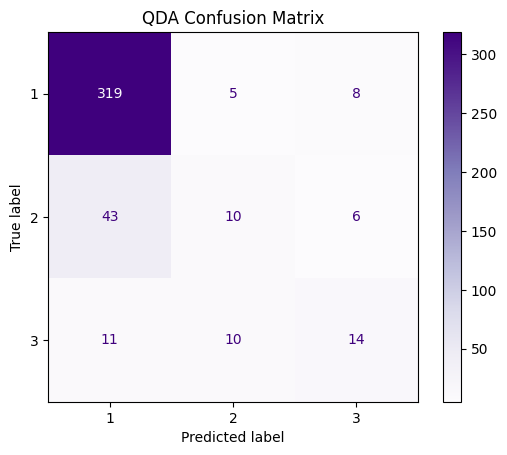

In [18]:
# 2) Confusion matrix
cm_qda = confusion_matrix(y_test, y_pred_qda)
disp_qda = ConfusionMatrixDisplay(confusion_matrix=cm_qda, display_labels=qda.classes_)
disp_qda.plot(cmap='Purples')
plt.title("QDA Confusion Matrix")
plt.show()

In [19]:
# 3) Percentage of correct classification per category
acc_per_class_qda = cm_qda.diagonal() / cm_qda.sum(axis=1) * 100
for label, acc in zip(qda.classes_, acc_per_class_qda):
    print(f"Class {label}: {acc:.2f}% correct")

Class 1: 96.08% correct
Class 2: 16.95% correct
Class 3: 40.00% correct


In [20]:
# 4) Visualization – scatter plot + decision boundaries
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

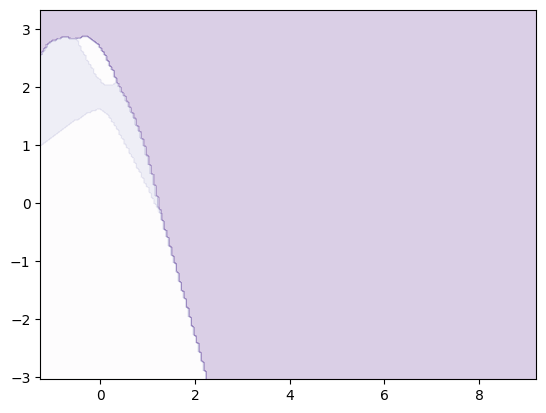

In [21]:
# Decision boundaries
Z_qda = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z_qda = Z_qda.reshape(xx.shape)
plt.contourf(xx, yy, Z_qda, alpha=0.2, cmap='Purples')

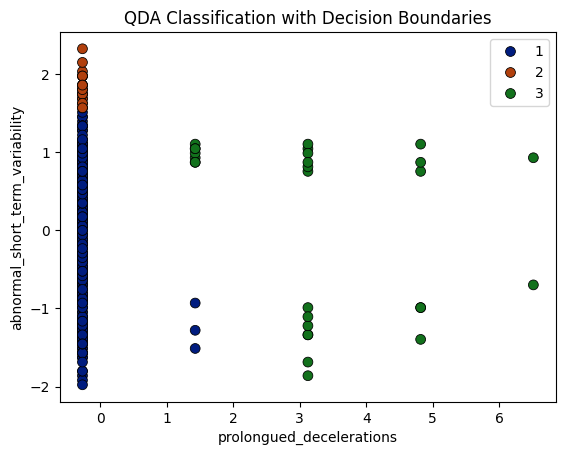

In [22]:
# Scatter plot of predicted classes
sns.scatterplot(
    x=X_test[:, 0],
    y=X_test[:, 1],
    hue=y_pred_qda,
    palette='dark',
    s=50,
    edgecolor='k'
)

plt.xlabel(top2_features[0])
plt.ylabel(top2_features[1])
plt.title("QDA Classification with Decision Boundaries")
plt.show()